# HW 2
## Titanic Survival Predictions
In this dataset, you will train a logistic regression model that can predict the survivors based on a set of features about the passenger. Start first by taking sometime to understand your data. You can find more info about the data and its breakdown in this link https://www.kaggle.com/c/titanic/data

### Start with Data Exploring
Your data is split into two files. One for training and one for testing. Load both and find out the number of samples and features in each file

In [79]:
import pandas as pd
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
print(df_train.shape)
print(df_test.shape)

(891, 12)
(418, 11)


In [80]:
df_train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [81]:
df_test.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


How many survivors in the traning set and in the test set?

In [82]:
df_train.groupby('Survived').count()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Survived,,,,,,,,,,,
0,549,549,549,549,424,549,549,549,549,68,549
1,342,342,342,342,290,342,342,342,342,136,340


Can you find Jack and Rose in the data? Use a code. You probably won't find them as they were fictional charachter. See if you can find Beatrice Irene Sandstorm? Read here about her https://www.encyclopedia-titanica.org/titanic-survivor/beatrice-irene-sandstrom.html

In [83]:
print(df_train.loc[df_train.Name.str.contains('Jack')])
print(df_test.loc[df_test.Name.str.contains('Jack')])
### no jack in the data

     PassengerId  Survived  Pclass                       Name   Sex  Age  \
766          767         0       1  Brewe, Dr. Arthur Jackson  male  NaN   

     SibSp  Parch  Ticket  Fare Cabin Embarked  
766      0      0  112379  39.6   NaN        C  
Empty DataFrame
Columns: [PassengerId, Pclass, Name, Sex, Age, SibSp, Parch, Ticket, Fare, Cabin, Embarked]
Index: []


In [84]:
print(df_train.loc[df_train.Name.str.contains('Rose')])
print(df_test.loc[df_test.Name.str.contains('Rose')])
##no rose in the data

     PassengerId  Survived  Pclass                        Name     Sex   Age  \
855          856         1       3  Aks, Mrs. Sam (Leah Rosen)  female  18.0   

     SibSp  Parch  Ticket  Fare Cabin Embarked  
855      0      1  392091  9.35   NaN        S  
     PassengerId  Pclass                                         Name     Sex  \
208         1100       1                Rosenbaum, Miss. Edith Louise  female   
327         1219       1  Rosenshine, Mr. George (Mr George Thorne")"    male   

      Age  SibSp  Parch    Ticket     Fare Cabin Embarked  
208  33.0      0      0  PC 17613  27.7208   A11        C  
327  46.0      0      0  PC 17585  79.2000   NaN        C  


In [85]:
df_test.loc[df_test.Name.str.contains('Beatrice')]
#Beatrice is in the data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
117,1009,3,"Sandstrom, Miss. Beatrice Irene",female,1.0,1,1,PP 9549,16.7,G6,S


### Does features make difference?
In the training dataset 
- Pclass - Usually, higher class (class 1) meant a more expensive fare and the other classes paid lesser to be on the ship. What was the survival rate per class?
- Sex — What was the survival rate of women?
- SibSp — What was the survival rate based on number of siblings the passenger had on the ship?
- Parch — What was the survival rate based on number of parents/children the passenger had on the ship?

In [86]:
df_train.head(3)
survive_perclass = df_train.groupby('Pclass').Survived.sum()
total_perclass = df_train.groupby('Pclass').Survived.count()
surviverate_class = survive_perclass/total_perclass
surviverate_class

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

In [87]:
features = ['Pclass','Sex','SibSp','Parch']
for ele in features:
    survive = df_train.groupby(ele).Survived.sum()
    total_number = df_train.groupby(ele).Survived.count()
    survive_rate = survive / total_number
    print(survive_rate)

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64
Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64
SibSp
0    0.345395
1    0.535885
2    0.464286
3    0.250000
4    0.166667
5    0.000000
8    0.000000
Name: Survived, dtype: float64
Parch
0    0.343658
1    0.550847
2    0.500000
3    0.600000
4    0.000000
5    0.200000
6    0.000000
Name: Survived, dtype: float64


Plot two histogram based on the age. One for the survivors and other for non survivors. According to the histogram was Jack more likely to survive or not survive and why?

Text(0.5,1,'survivors based on age')

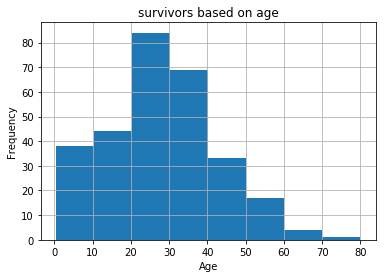

In [88]:
# Jack is not likely to live, because the frequency of 20_30 group in nonsurvive plot is more than in survive plot
import matplotlib.pyplot as plt
x = df_train[df_train.Survived ==1].Age
x.hist(bins=8)
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("survivors based on age")

Text(0.5,1,'non survivors based on age')

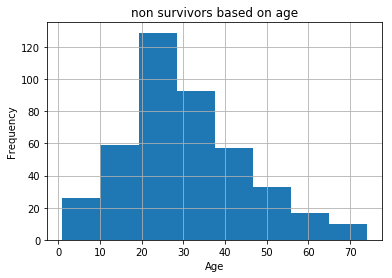

In [89]:
x = df_train[df_train.Survived ==0].Age
x.hist(bins=8)
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("non survivors based on age")

Divide the age histograms on a 3 X 2 subplots. Left column is for non survival data and the right one is for survivors. Each row is for one of the three PClasses

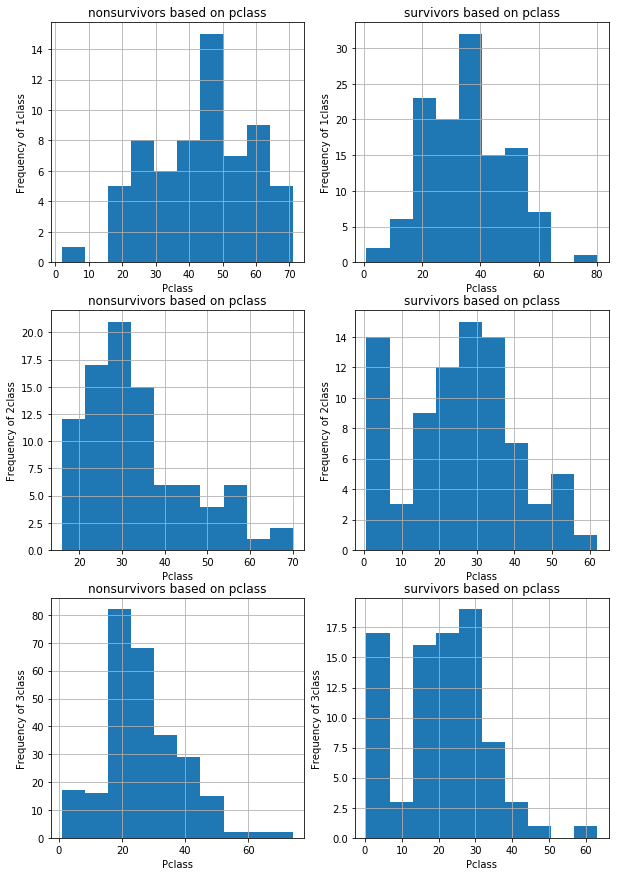

In [90]:
df_survive = df_train[df_train.Survived == 1]
df_nonsurvive = df_train[df_train.Survived == 0]
# df_survive[df_survive.Pclass == 1].Age.hist()
pclass = [1,2,3]
plt.figure(figsize=(10,15))

i = 1
for ele in pclass:
    plt.subplot(3,2,i)
    df_nonsurvive[df_nonsurvive.Pclass == ele].Age.hist()
    plt.title(ele)
    plt.xlabel("Pclass")
    plt.ylabel("Frequency of " + str(ele) + "class")
    plt.title('nonsurvivors based on pclass')
    
    i = i + 1
    plt.subplot(3,2,i)
    df_survive[df_survive.Pclass == ele].Age.hist()
    i = i + 1
    plt.xlabel("Pclass")
    plt.ylabel("Frequency of " + str(ele) + "class")
    plt.title(ele)
    plt.title('survivors based on pclass')

## Fix missing Data
Which features in the training contains missing values? and how many missing values are there?

In [91]:
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Find out the age median grouped by PClass and gender. Clean up the data by substituting the nans by the median from the corresponding PClass and gender

In [1]:
print(df_train.groupby(['Pclass', 'Sex']).Age.median())
df_train['Age'] = df_train['Age'].fillna(df_train.groupby(['Pclass', 'Sex'])['Age'].transform('median'))
df_train.head(10)

NameError: name 'df_train' is not defined

For the Embarked column, substitute the missing value with the highest occurance value among the entire dataset

In [93]:
df_train.groupby('Embarked').count()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin
Embarked,,,,,,,,,,,
C,168,168,168,168,168,168,168,168,168,168,69
Q,77,77,77,77,77,77,77,77,77,77,4
S,644,644,644,644,644,644,644,644,644,644,129


In [94]:
df_train['Embarked'] = df_train['Embarked'].fillna('S')
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

# Let's do our Model
Cabin, Name, ticket and Passenger Id are not important to our ML model. Let's get rid of them

In [95]:
x = df_train[['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']]
y = df_train.Survived

Make sure now that your data does not have any nulls

In [96]:
x.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [97]:
y.isnull().sum()

0

We need to convert some of our features to categories and numbers instead of letters as logistic regression model won't be able to decode them. Map the embarked variable into 0,1, and 2 and the sex variable into 0 and 1

% hint: `df_train['Embarked'].astype('category').cat.codes`

In [98]:
x['Embarked'] = x.Embarked.astype('category').cat.codes
x['Sex'] = x.Sex.astype('category').cat.codes
x.head(5)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,1,0,7.2500,2
1,1,0,38.0,1,0,71.2833,0
2,3,0,26.0,0,0,7.9250,2
3,1,0,35.0,1,0,53.1000,2
4,3,1,35.0,0,0,8.0500,2


You are now ready to build a logistic regression model and fit it 

In [99]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
### scale the data and build model
scaler = StandardScaler().fit(x)
x_scaled=scaler.transform(x)
mod=LogisticRegression()
mod.fit(x_scaled,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

Show the training score and validation score. You may need to do same cleaning you have done in the training data to the validation data

In [100]:
score_train = mod.score(x_scaled,y)
score_train

0.8080808080808081

In [101]:
##### clean up test data
df_test.dropna(subset=['Fare'], inplace=True)
df_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          326
Embarked         0
dtype: int64

In [103]:
df_test['Age'] = df_test['Age'].fillna(df_test.groupby(['Pclass', 'Sex'])['Age'].transform('median'))
df_test['Embarked'] = df_test['Embarked'].fillna('S')
df_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          326
Embarked         0
dtype: int64

In [111]:
x_test = df_test[['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']]
x_test['Embarked'] = x_test.Embarked.astype('category').cat.codes
x_test['Sex'] = x_test.Sex.astype('category').cat.codes
x_test.isnull().sum()

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [112]:
x_test_scaled=scaler.transform(x_test)

What are the coefficients. Make a plot that shows the importance of each feature in your model

In [113]:
mod.coef_

array([[-0.97497661, -1.27988999, -0.56637168, -0.37452556, -0.07090765,
         0.09214013, -0.15339128]])

<BarContainer object of 7 artists>

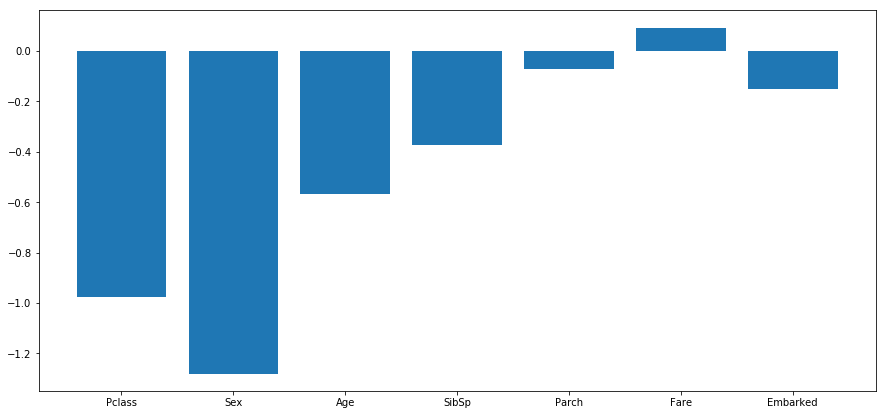

In [114]:
import matplotlib.pyplot as plt
plt.figure(figsize = [15,7])
plt.bar(list(x),mod.coef_[0])

Use the logistic regression model on the test data to predict who will survive. You may need to do same cleaning you have done in the training data to the test data

In [116]:
predictions = mod.predict(x_test_scaled)
predictions

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,

How many will survive from the test dataset?

In [117]:
df_test['Survive'] = predictions
df_test[df_test.Survive == 1].PassengerId.count()

156